<a href="https://colab.research.google.com/github/pirgus/MLclustering/blob/main/trabalhoAM2_agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

In [ ]:
def plotagraficos (opiniao,modelo):
  f,(ax1)=plt.subplots(1,sharey=True,figsize=(5,5))
  ax1.set_title(label=modelo)
  ax1.scatter(DadosTreino['x'],DadosTreino['y'],c=opiniao,cmap="rainbow")
  #ax2.set_title("Original")
  #ax2.scatter(DadosTreino['x'],DadosTreino['y'],c=dados['label'],cmap="rainbow")


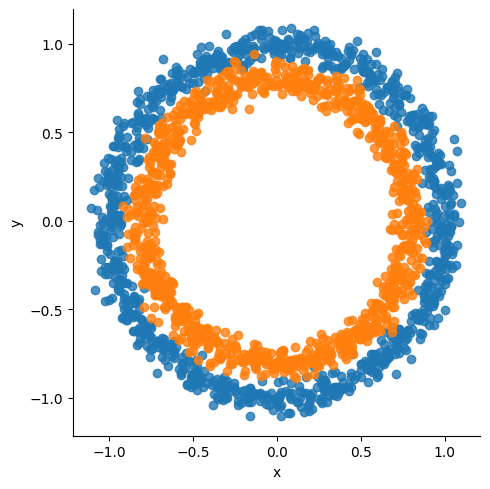

             x         y  label
0     0.558716 -0.539436      1
1    -0.378157 -0.795696      1
2    -0.845564 -0.101874      1
3    -0.950084  0.196330      0
4     0.370351  0.690030      1
...        ...       ...    ...
1995  0.705396  0.313539      1
1996 -0.801924  0.087550      1
1997  0.874251 -0.108298      1
1998 -0.640895 -0.338786      1
1999  0.637028 -0.698053      0

[2000 rows x 3 columns]
0       0.558716
1      -0.378157
2      -0.845564
3      -0.950084
4       0.370351
          ...   
1995    0.705396
1996   -0.801924
1997    0.874251
1998   -0.640895
1999    0.637028
Name: x, Length: 2000, dtype: float64


In [ ]:
dados = pd.read_csv("Base8.csv")
df_dados = pd.DataFrame(dados)
sns.lmplot( x="x", y="y", data=df_dados, fit_reg=False, hue='label', legend=False)

plt.show()
print(df_dados)
print(df_dados['x'])

Modelo de regressão linear múltipla

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

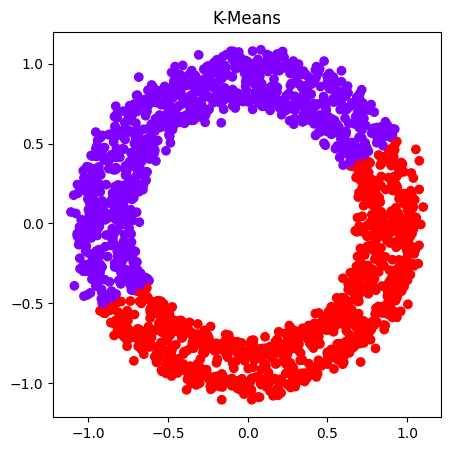

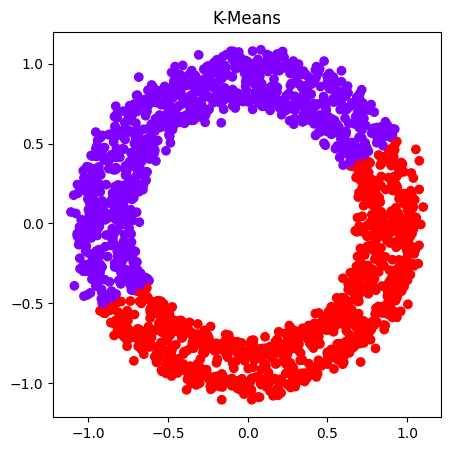

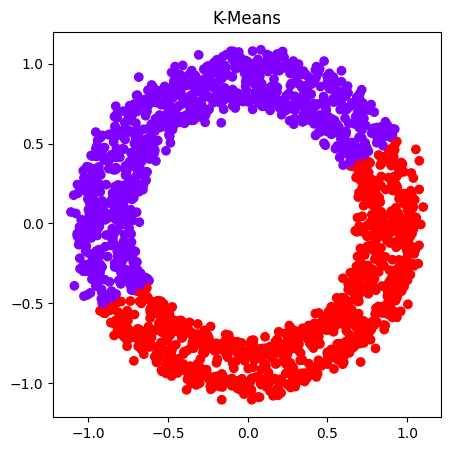

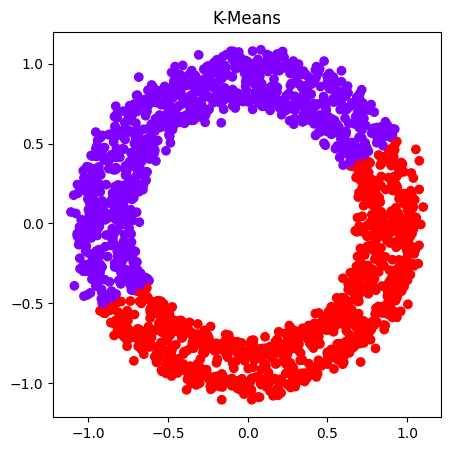

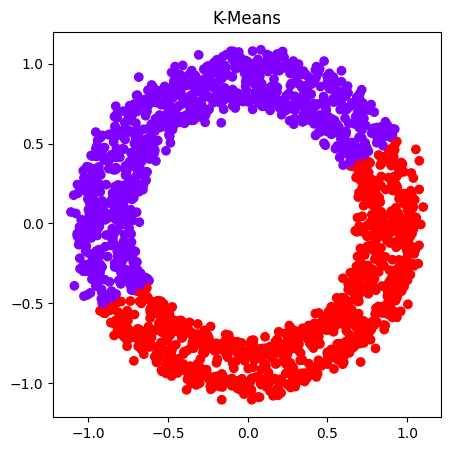

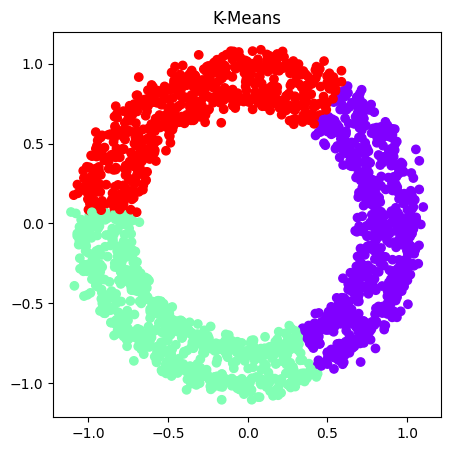

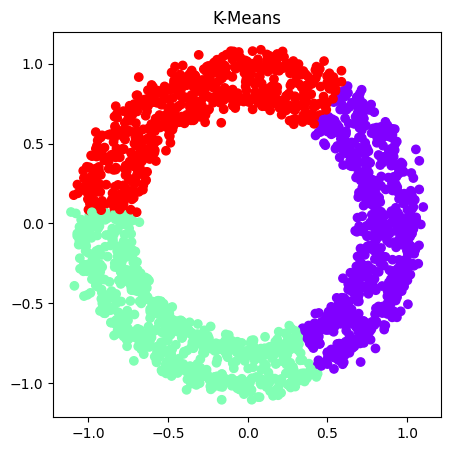

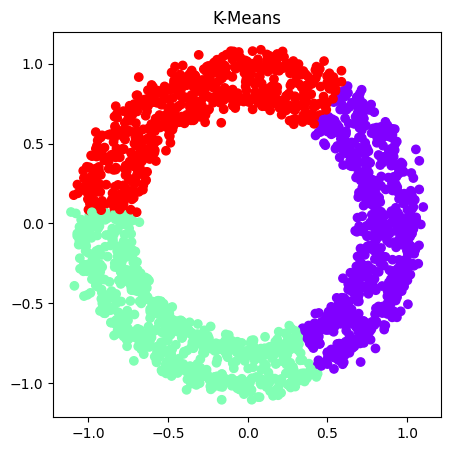

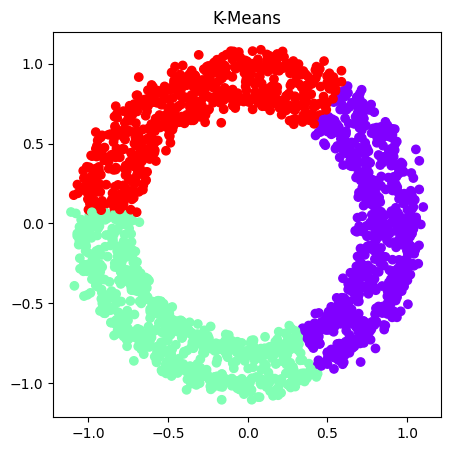

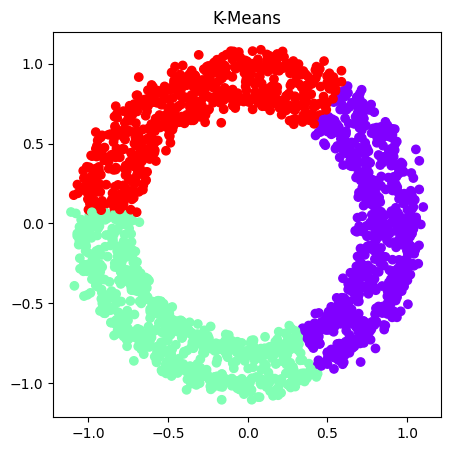

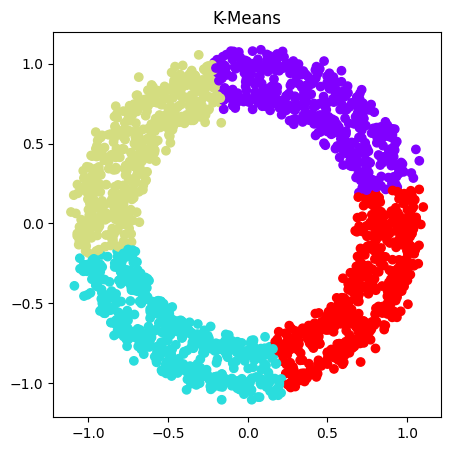

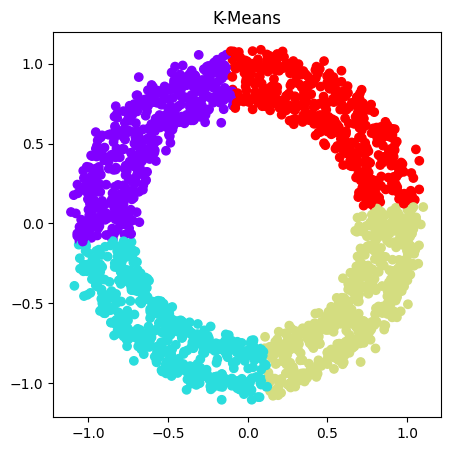

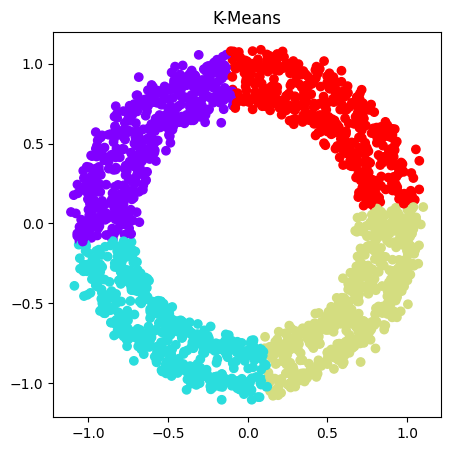

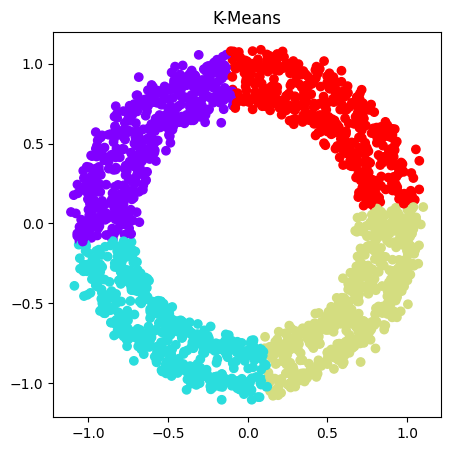

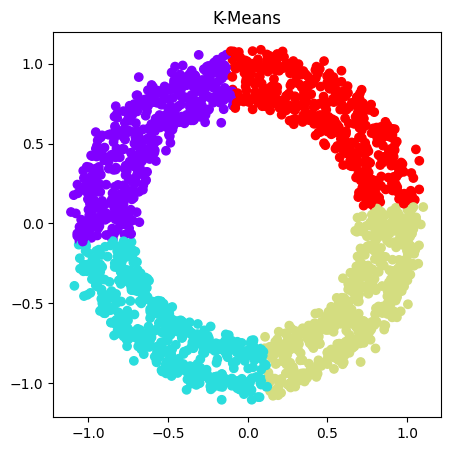

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

kmeans = KMeans(n_clusters=2, max_iter=100,random_state=0)
DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
kmeans.fit(DadosTreino)
X = kmeans.labels_


resultados = open('resultados_kmeans.txt', 'w')

for i in range(2, 4 + 1):
    for j in range(10, 50 + 1, 10):
        resultados.write(f"\nn_clusters = {i}\n")
        resultados.write(f"max_iter = {j}\n\n")
        kmeans = KMeans(n_clusters=i, max_iter=j,random_state=0)
        kmeans.fit(DadosTreino)
        X = kmeans.labels_
        #print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)
        resultados.write(f"{kmeans.inertia_}\n")

        #print("\nCoesão: ",math.sqrt(kmeans.inertia_)/ kmeans.n_clusters)
        resultados.write(f"{math.sqrt(kmeans.inertia_)/ kmeans.n_clusters}\n")

        #print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,kmeans.labels_))
        resultados.write(f"{metrics.silhouette_score(DadosTreino,kmeans.labels_)}\n")

        #print("\nRand Score K-means: ",metrics.rand_score(dados['label'],kmeans.labels_))
        resultados.write(f"{metrics.rand_score(dados['label'],kmeans.labels_)}\n")

        #print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],kmeans.labels_))
        resultados.write(f"{metrics.homogeneity_score(dados['label'],kmeans.labels_)}\n")

        #print("\nCompletude : ",metrics.completeness_score(dados['label'],kmeans.labels_))
        resultados.write(f"{metrics.completeness_score(dados['label'],kmeans.labels_)}\n")

        #print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], kmeans.labels_))
        resultados.write(f"{contingency_matrix(dados['label'], kmeans.labels_)}\n")
        plotagraficos(X,'K-Means')

Avaliando os clusters gerados

In [ ]:
import math

def calculate_inertia(labels, X):  # acho que ta errada essa funcao
    unique_labels = np.unique(labels)
    inertia = 0.0

    for label in unique_labels:
        if label == -1:
            continue  # Ignorar pontos de ruído
        cluster_points = DadosTreino[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        squared_distances = np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
        inertia += squared_distances

    return inertia


<ipython-input-2-4733482aa37d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f,(ax1)=plt.subplots(1,sharey=True,figsize=(5,5))


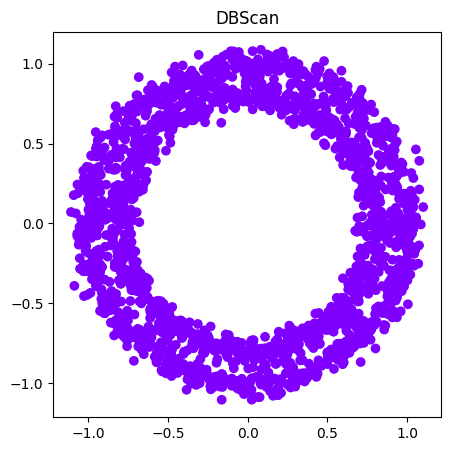

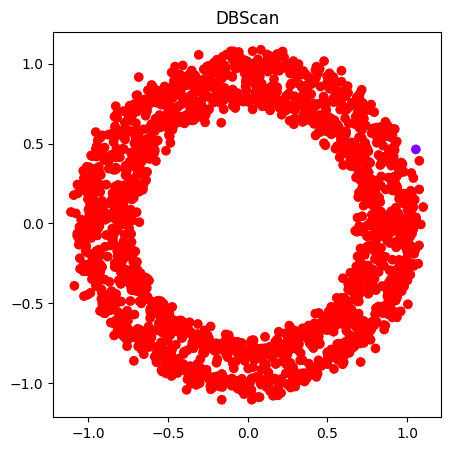

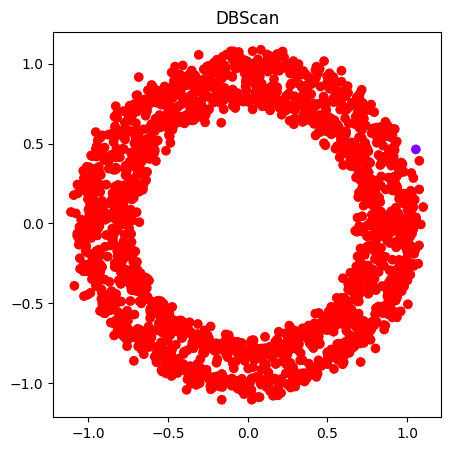

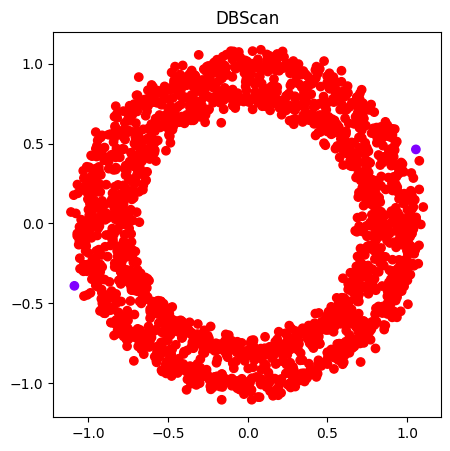

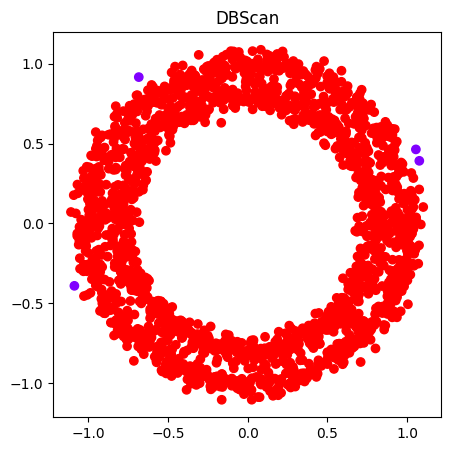

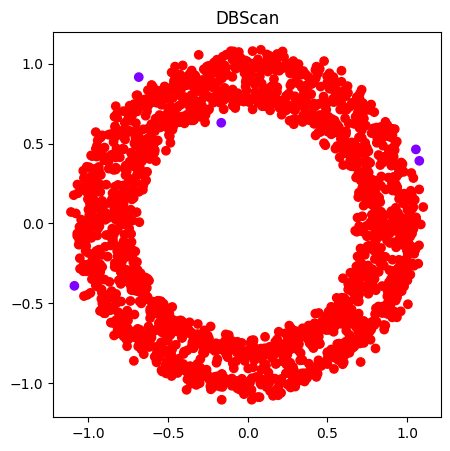

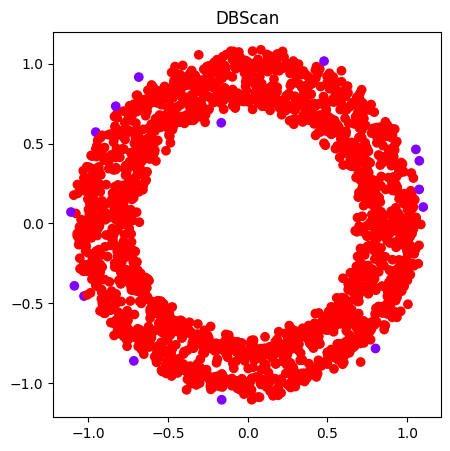

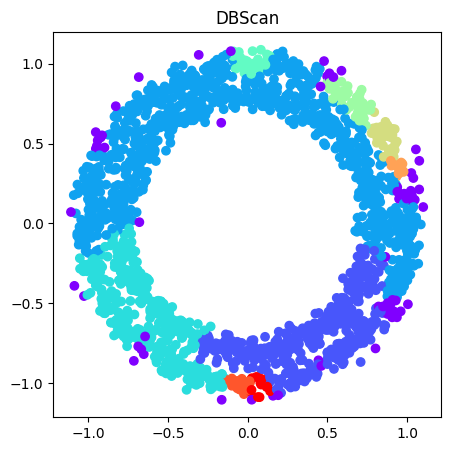

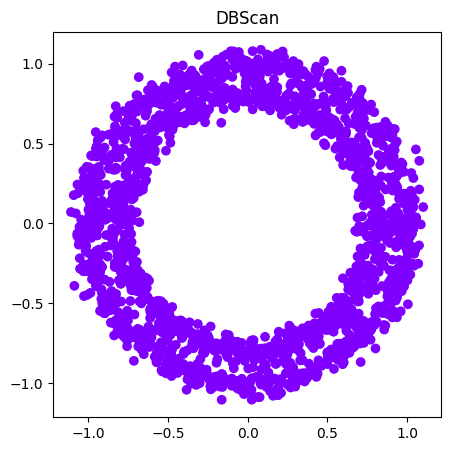

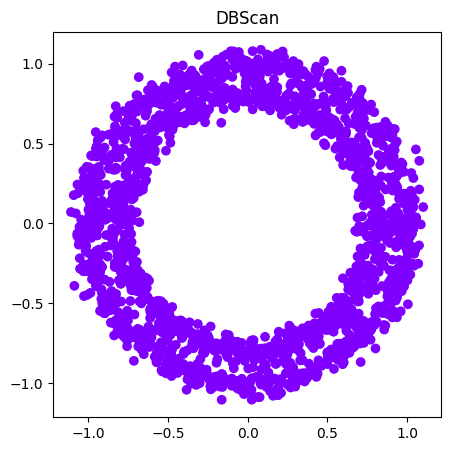

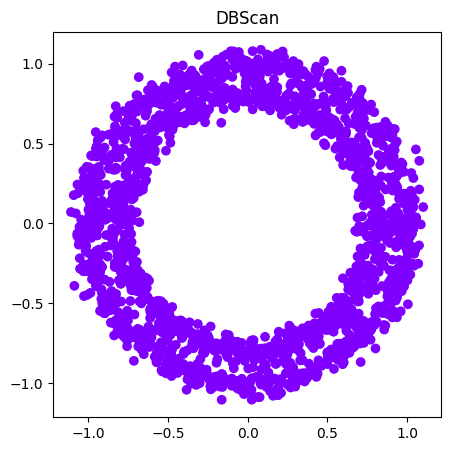

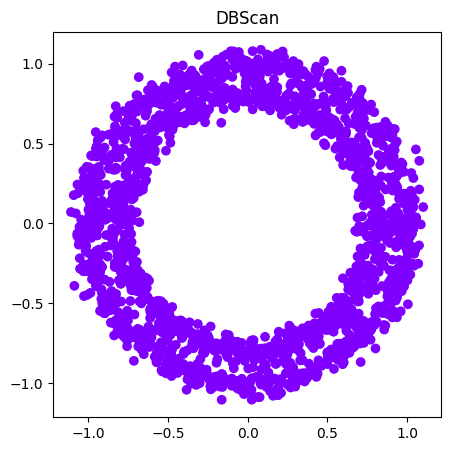

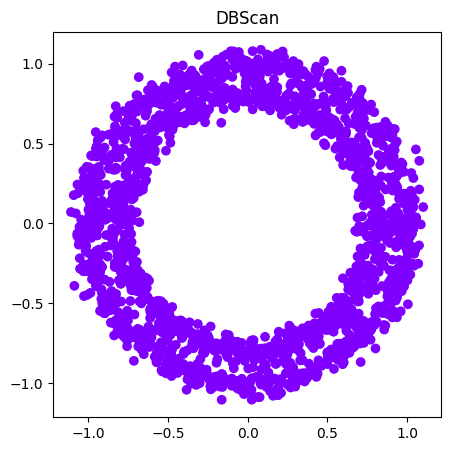

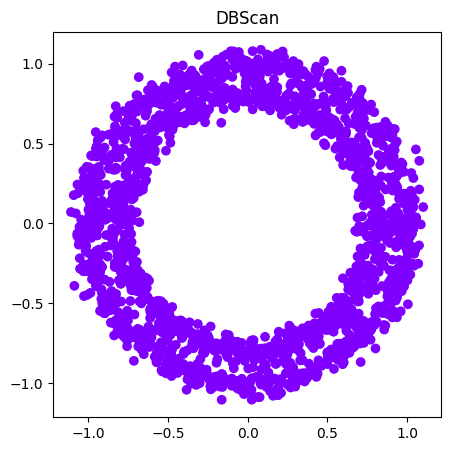

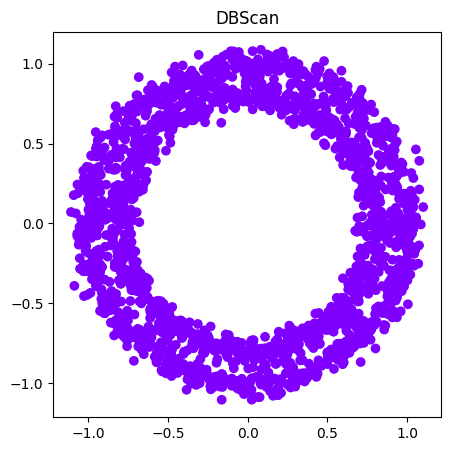

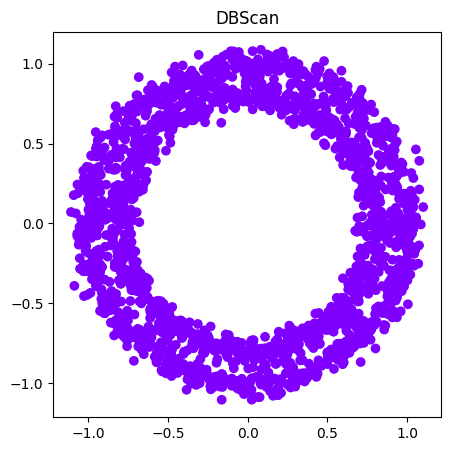

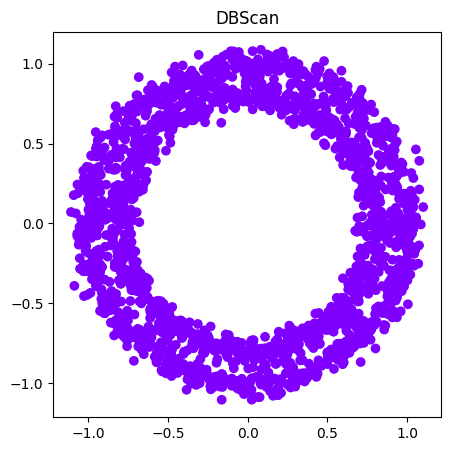

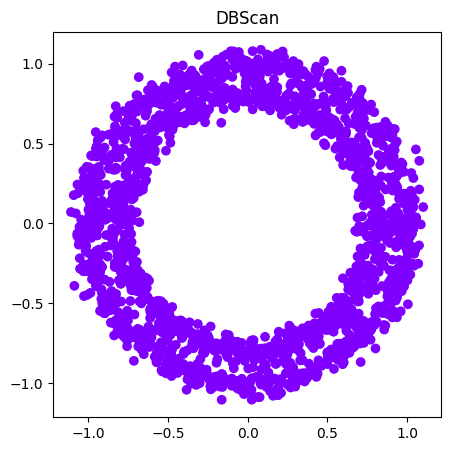

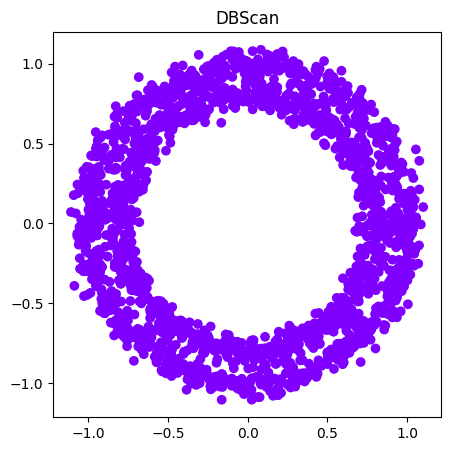

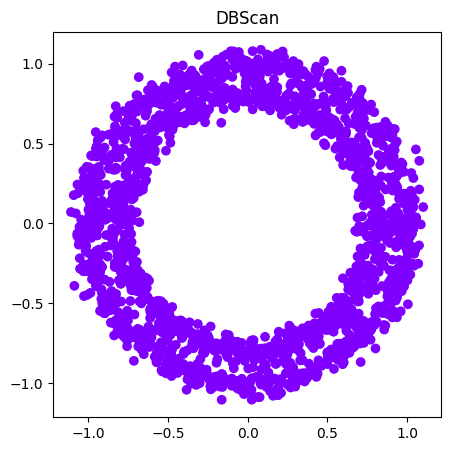

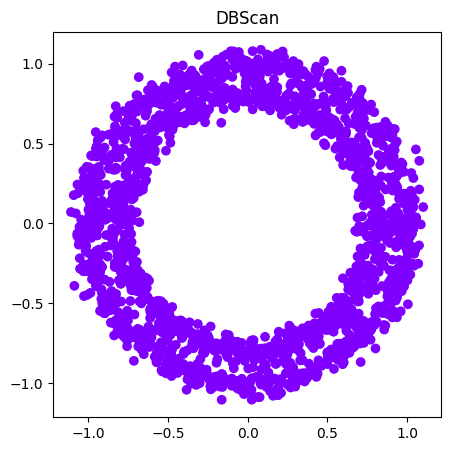

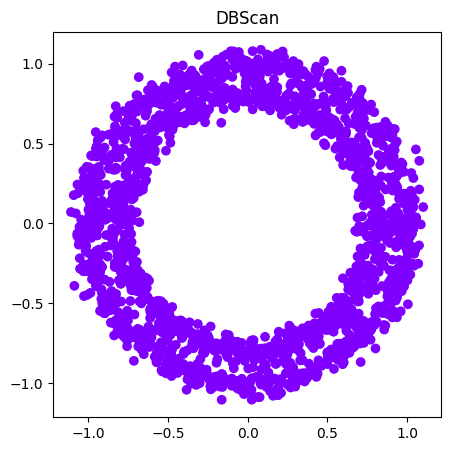

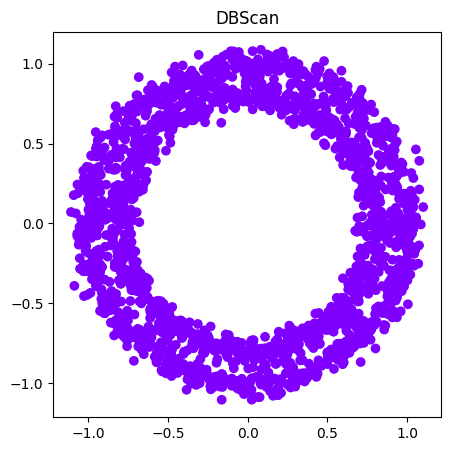

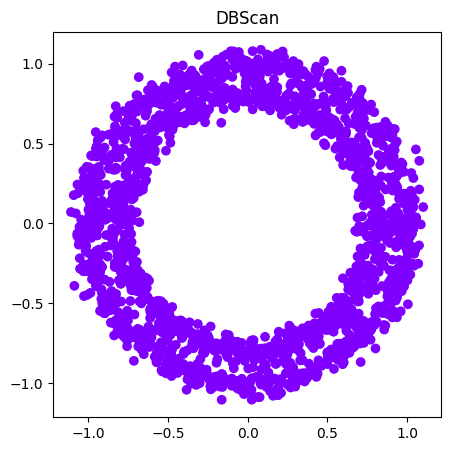

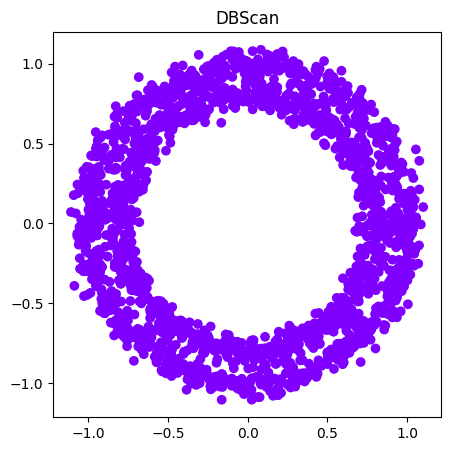

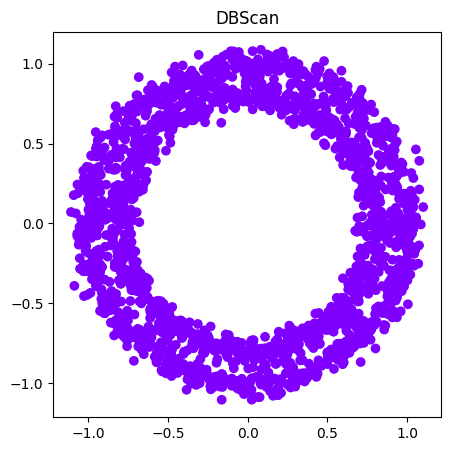

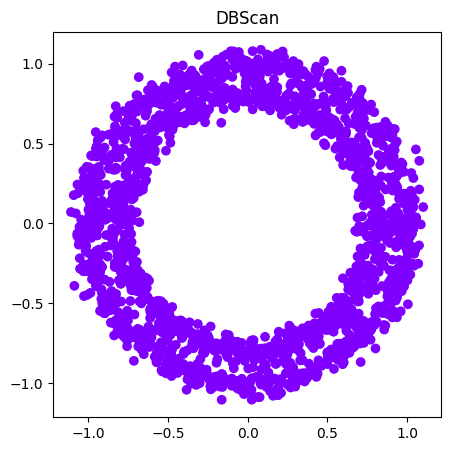

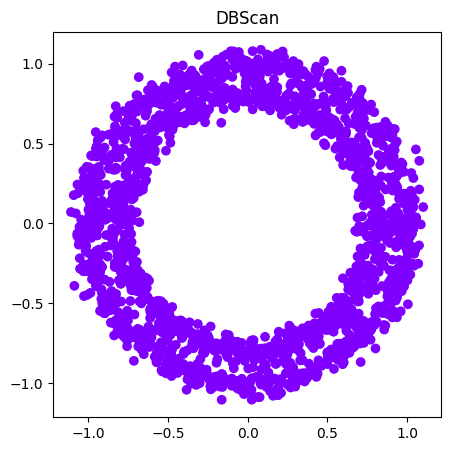

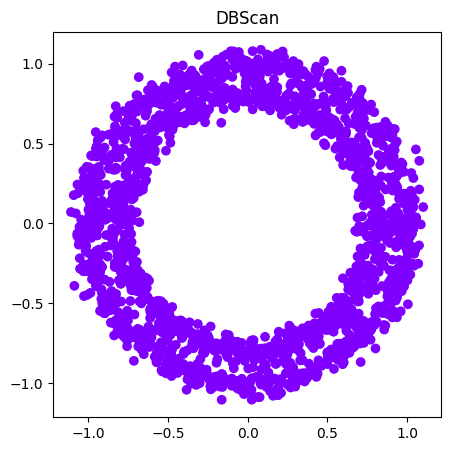

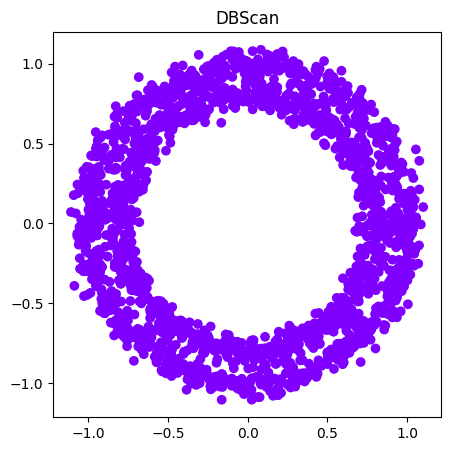

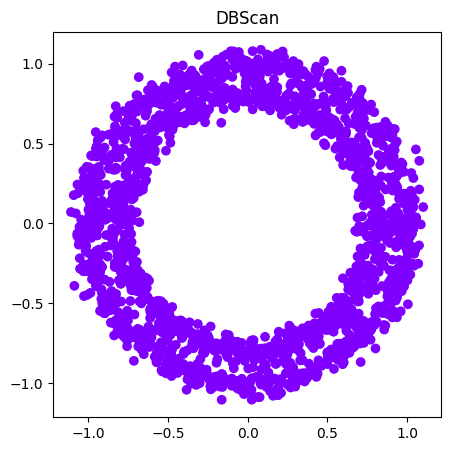

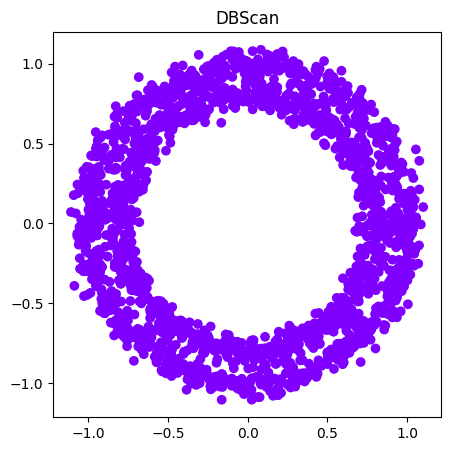

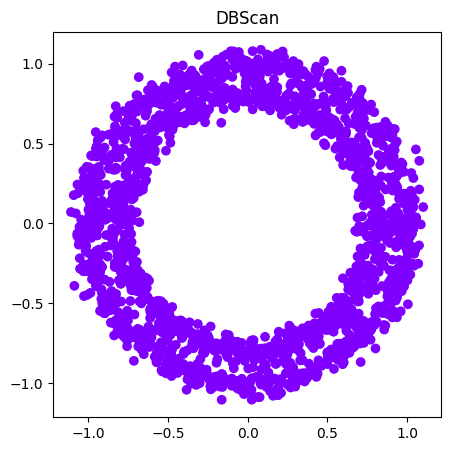

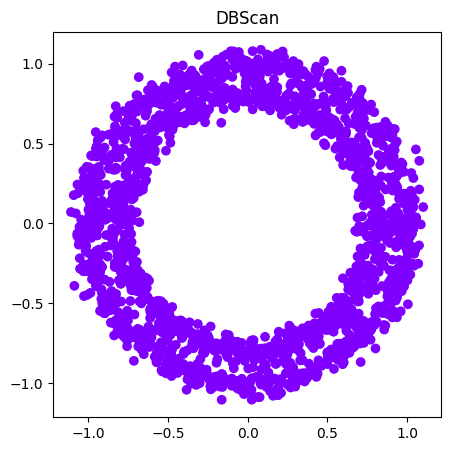

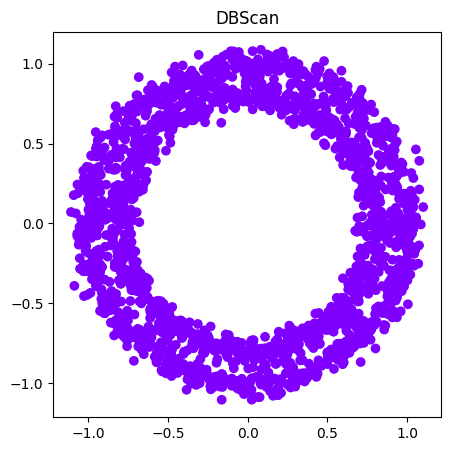

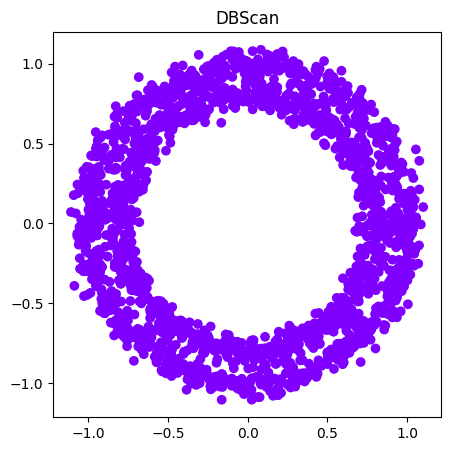

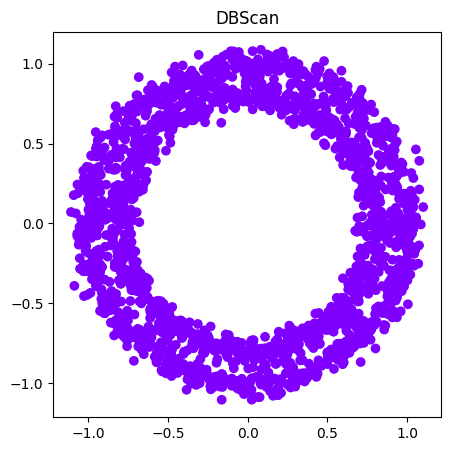

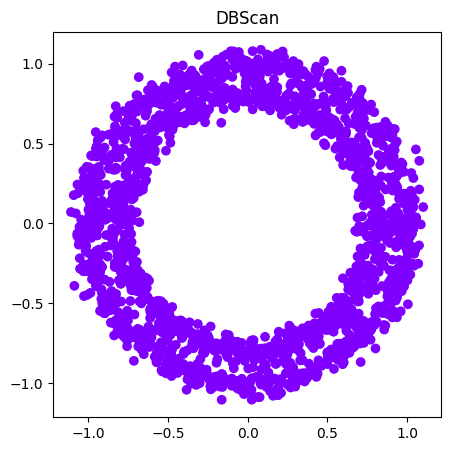

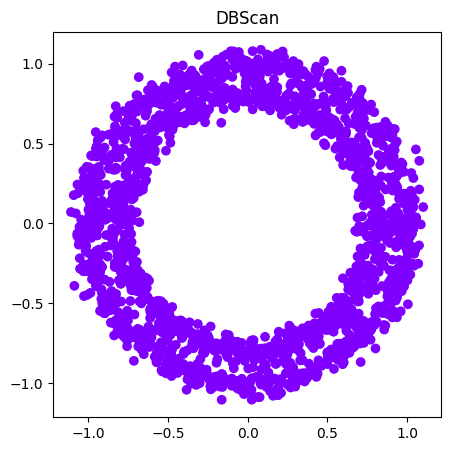

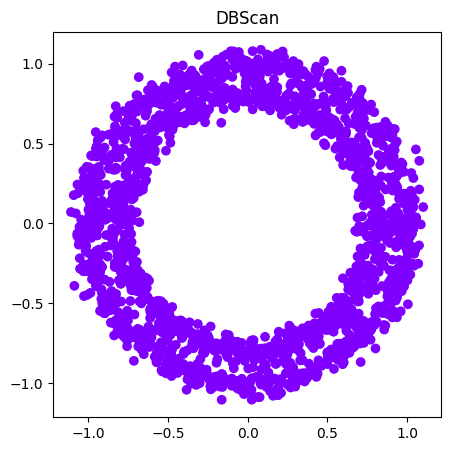

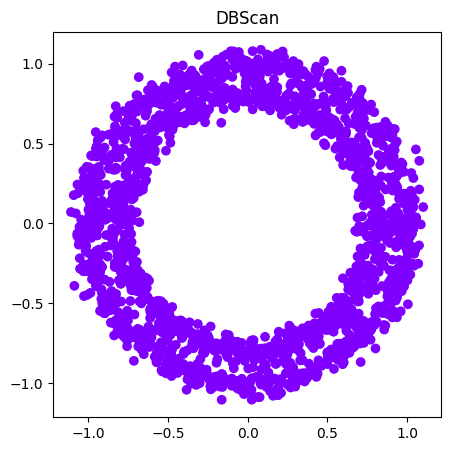

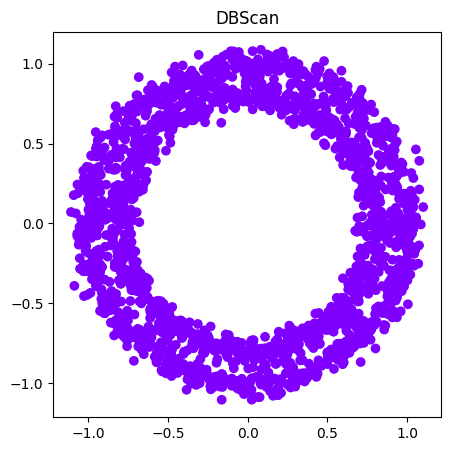

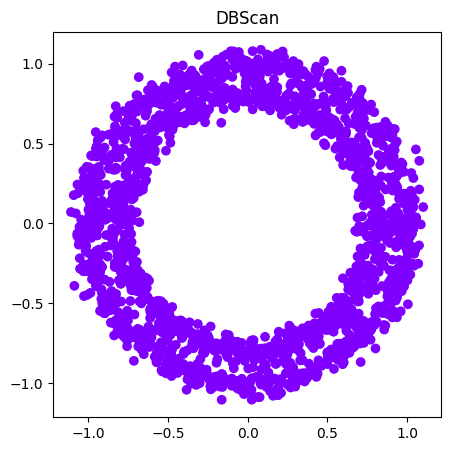

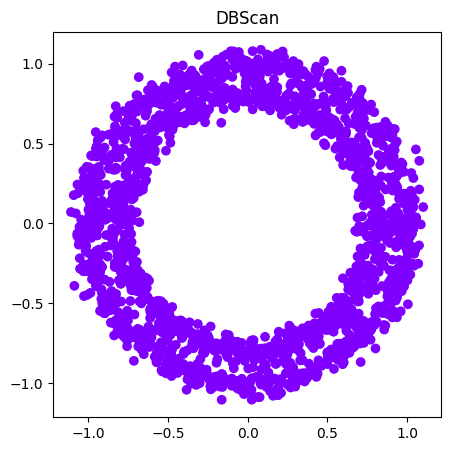

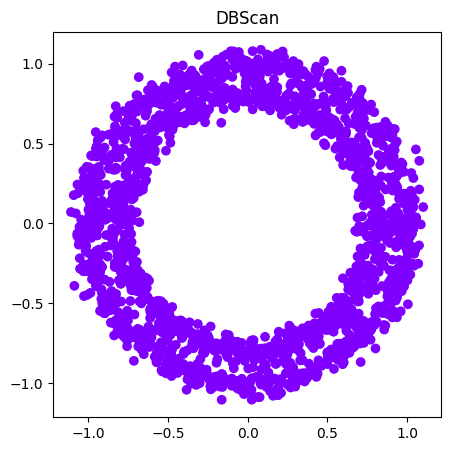

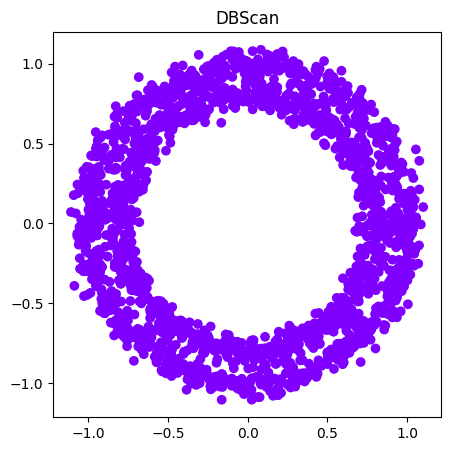

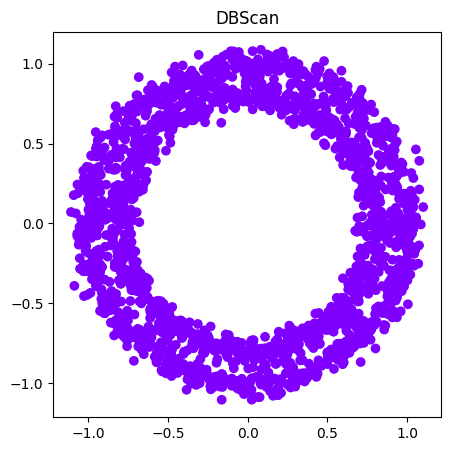

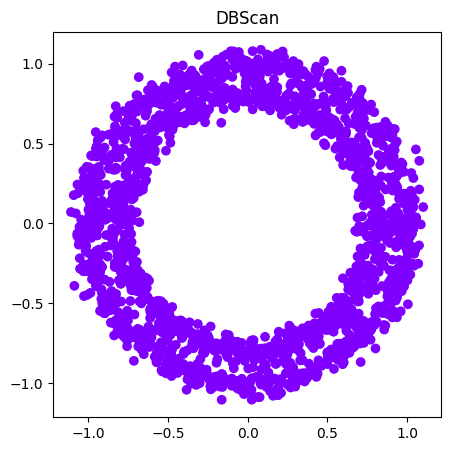

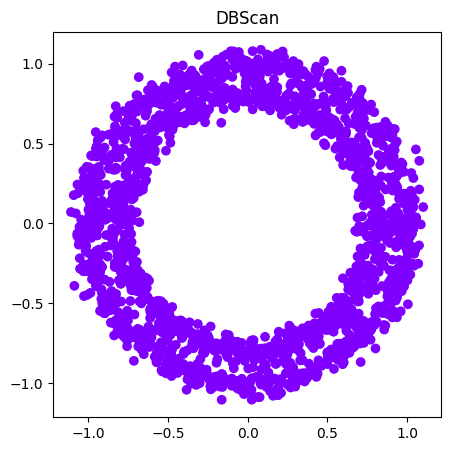

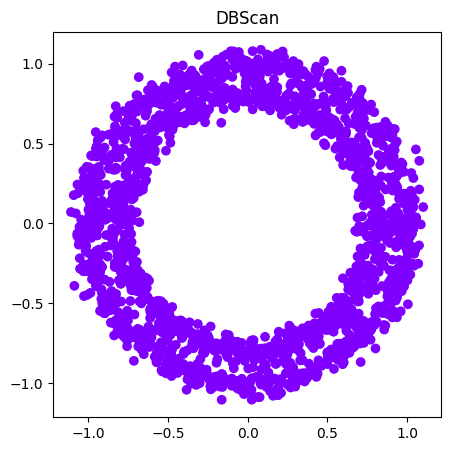

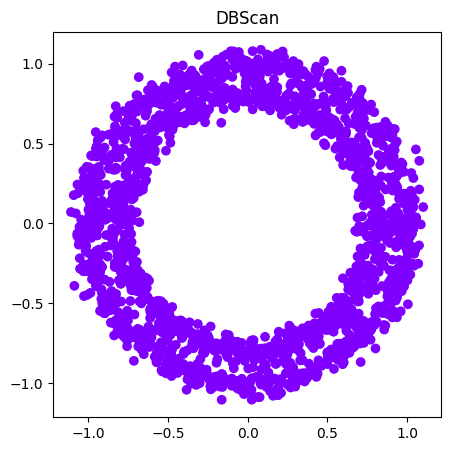

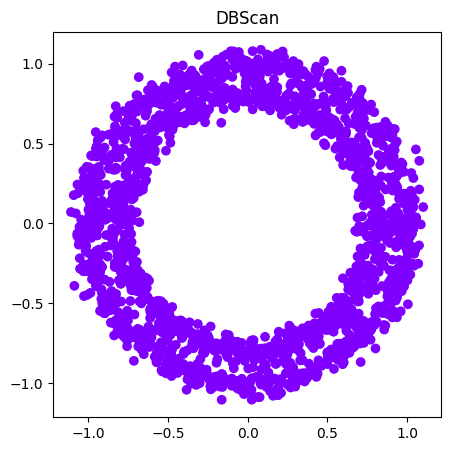

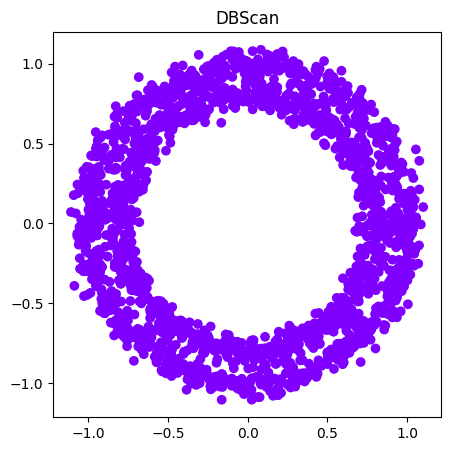

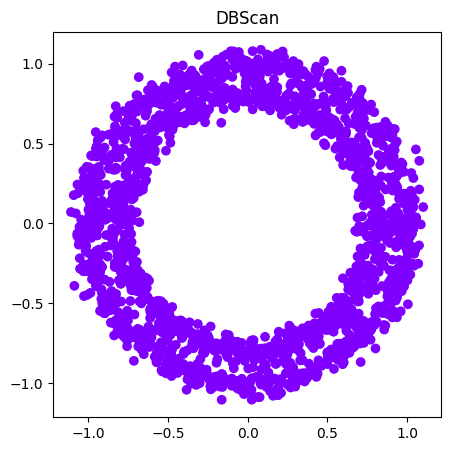

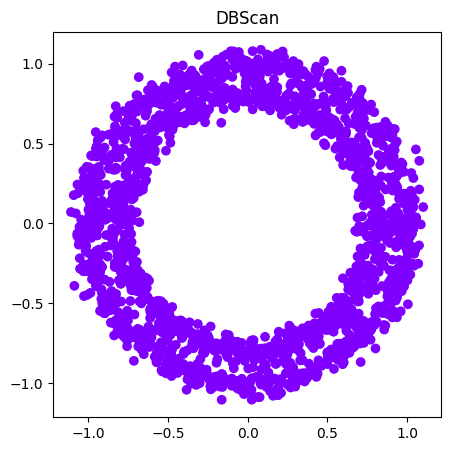

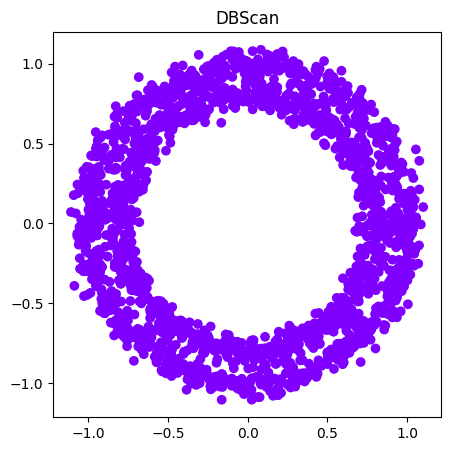

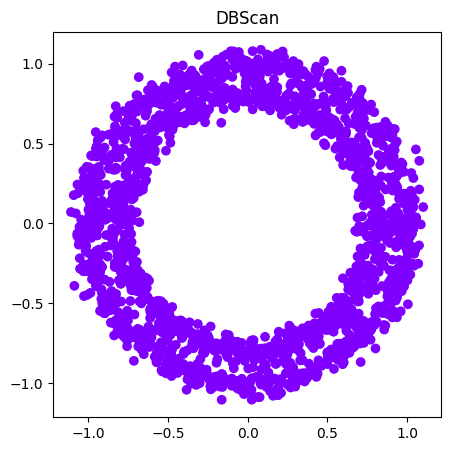

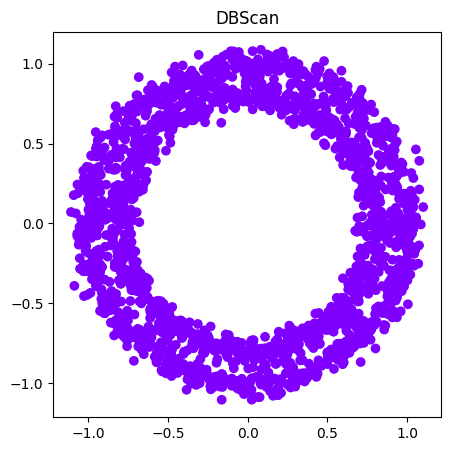

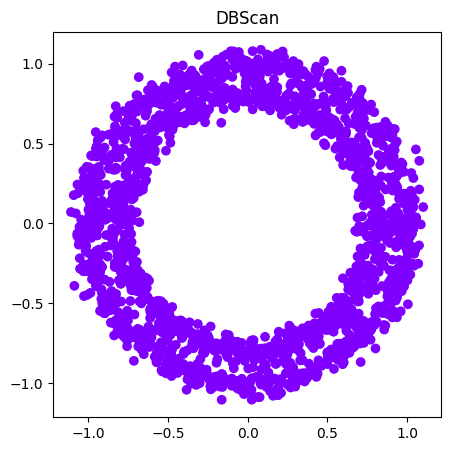

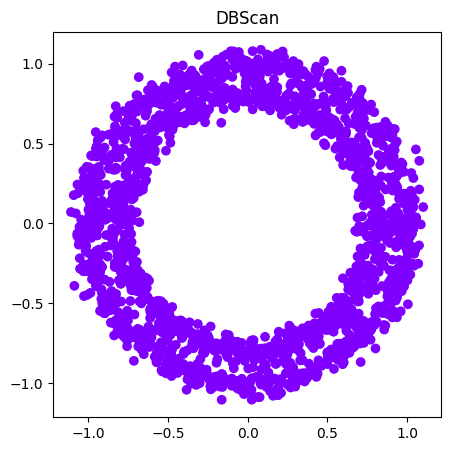

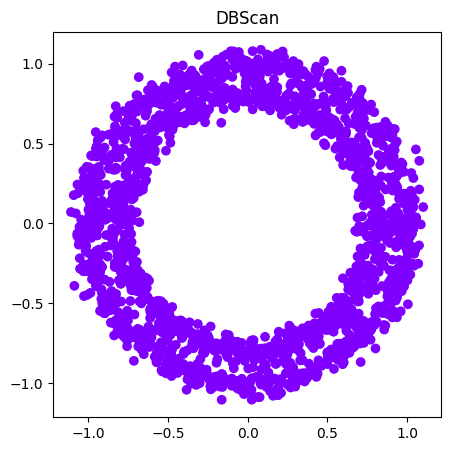

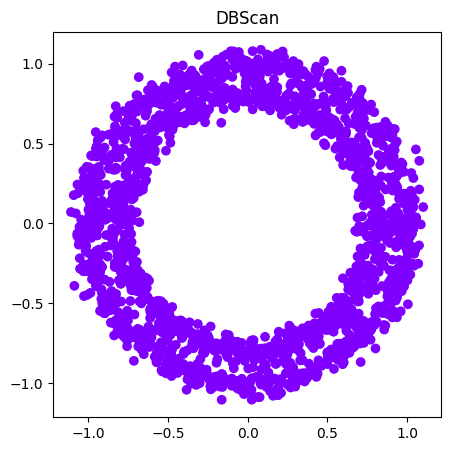

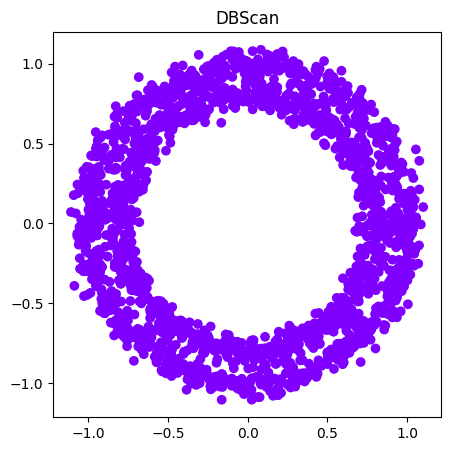

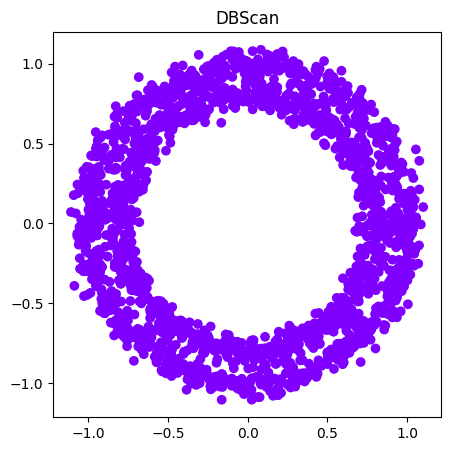

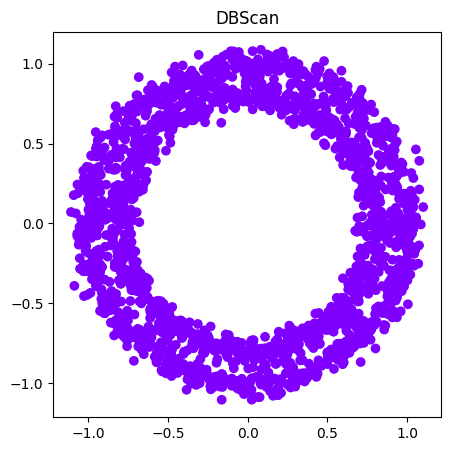

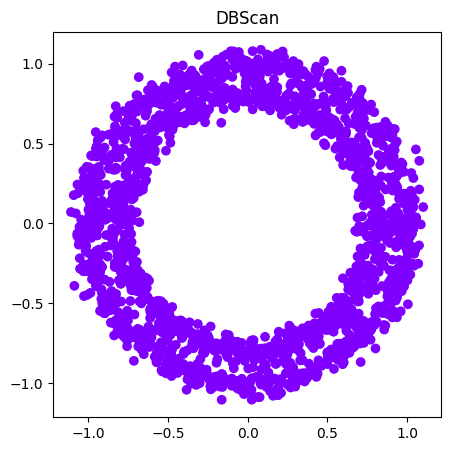

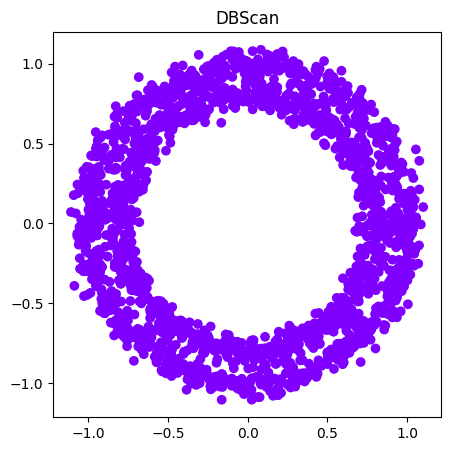

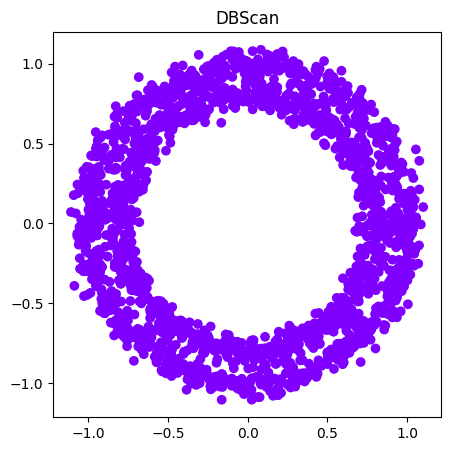

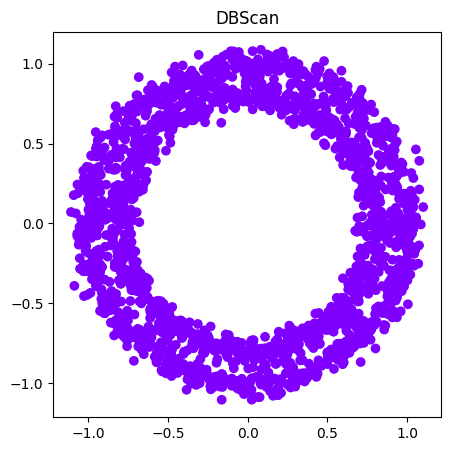

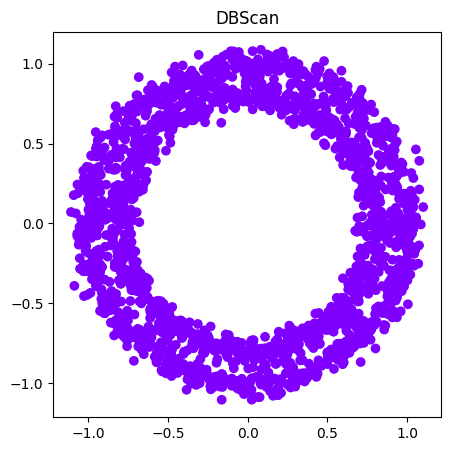

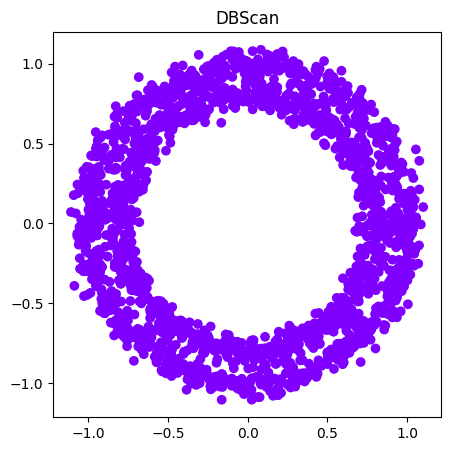

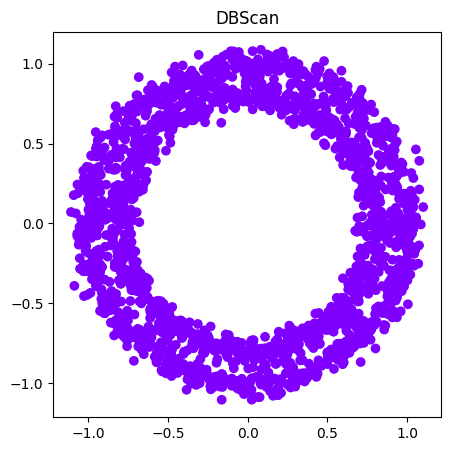

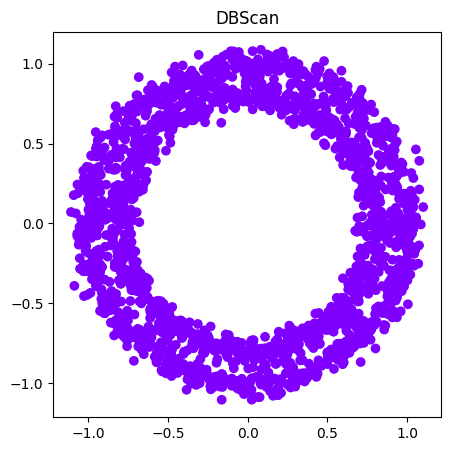

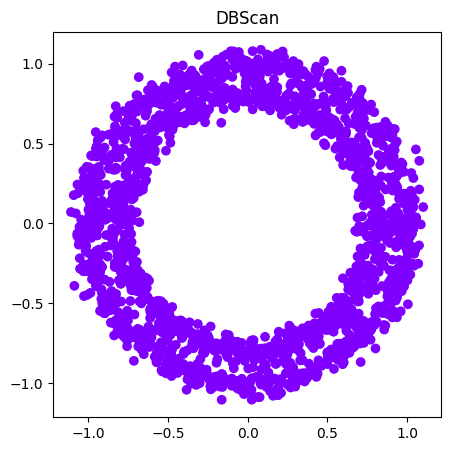

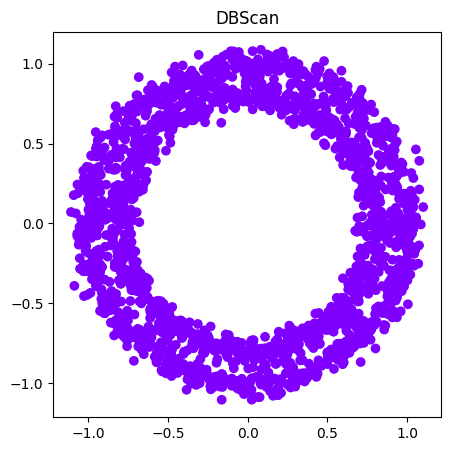

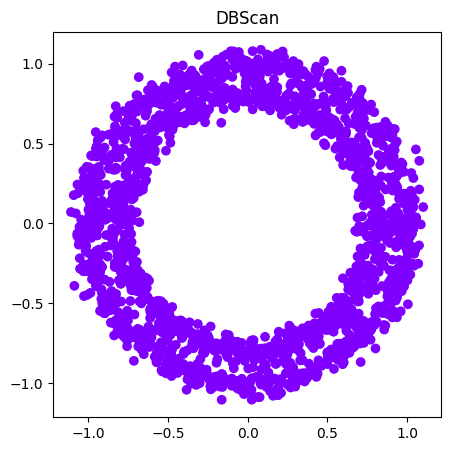

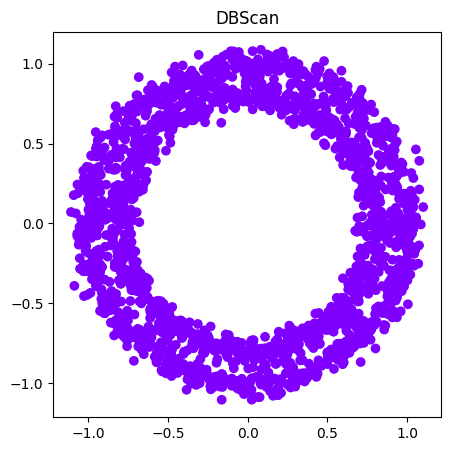

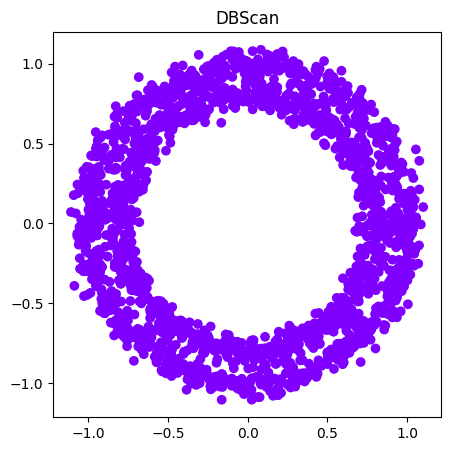

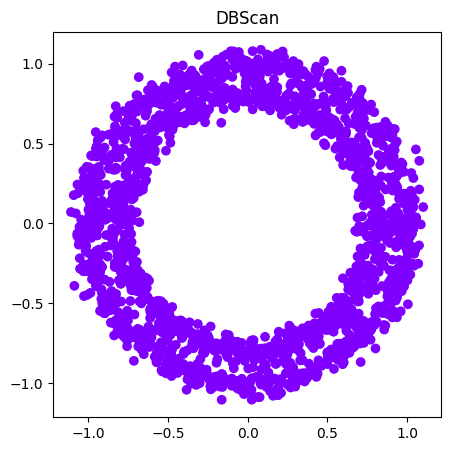

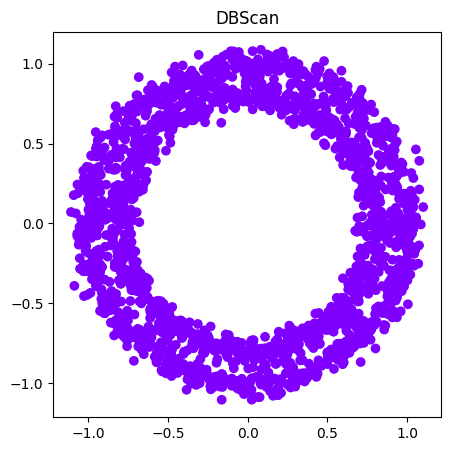

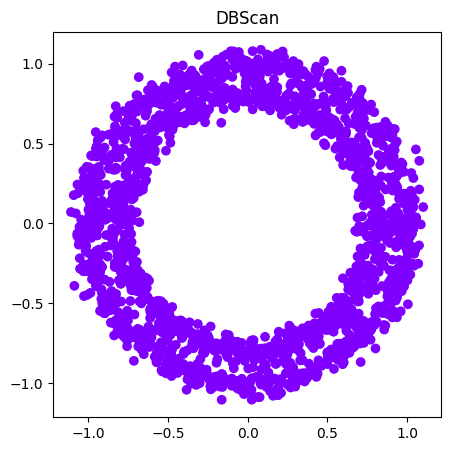

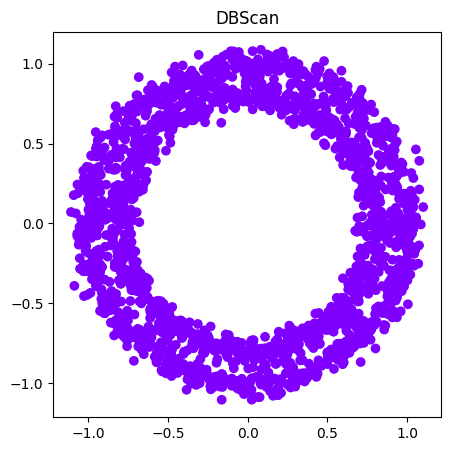

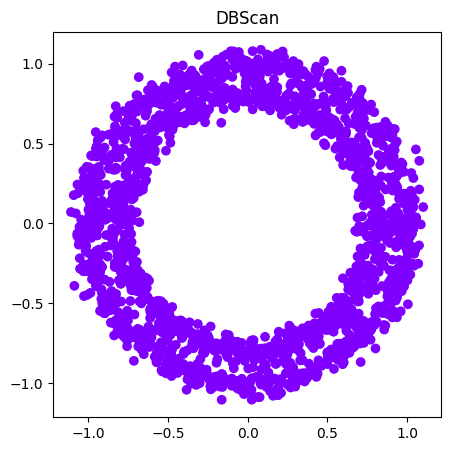

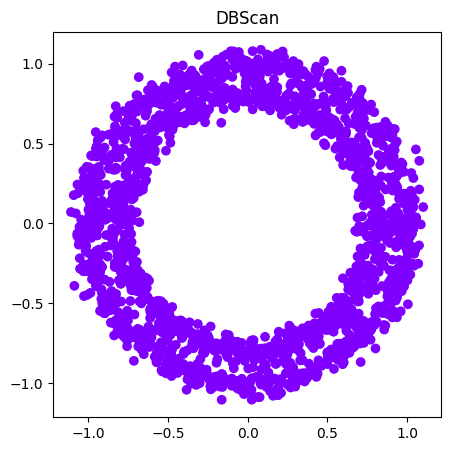

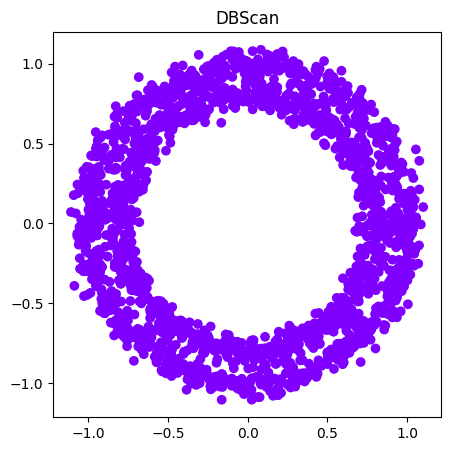

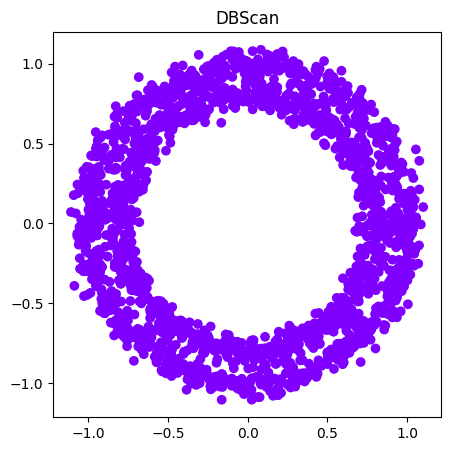

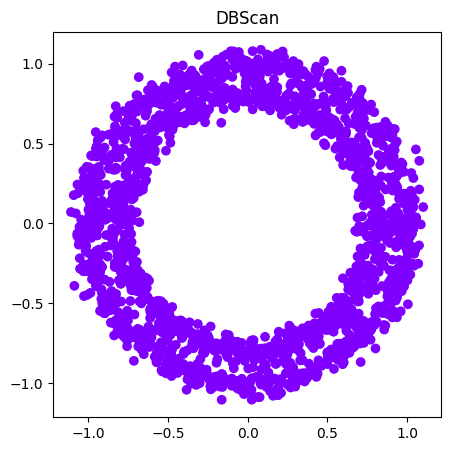

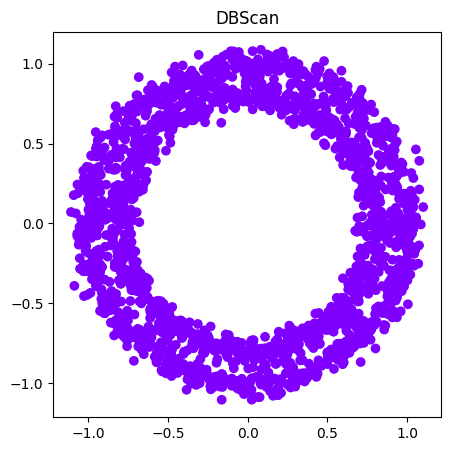

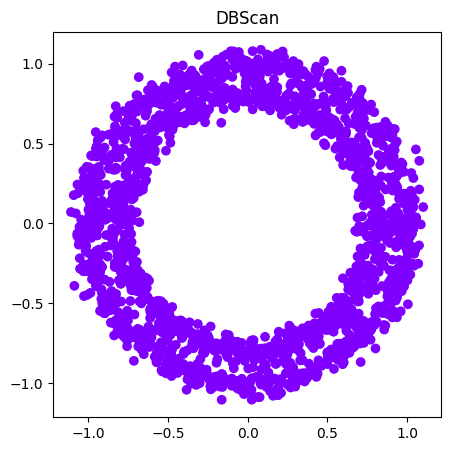

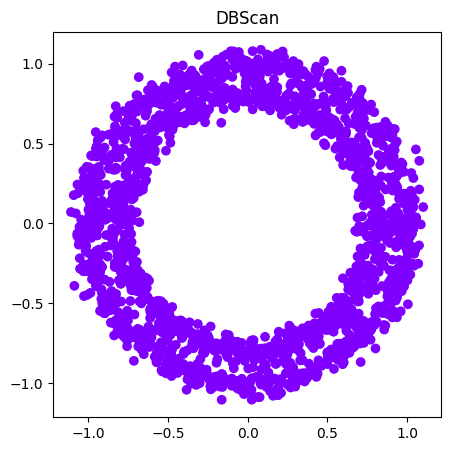

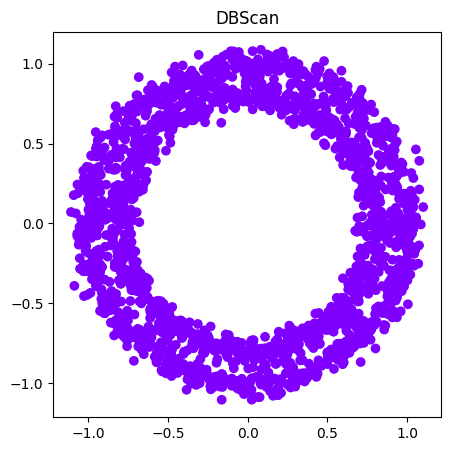

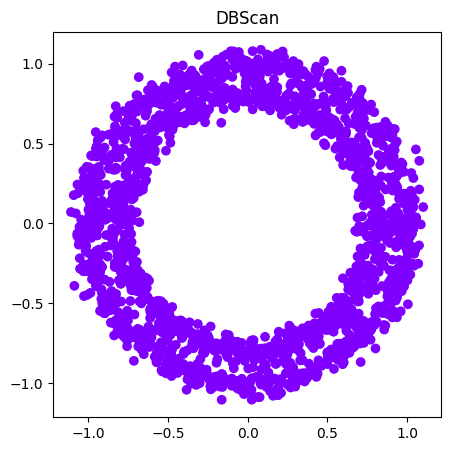

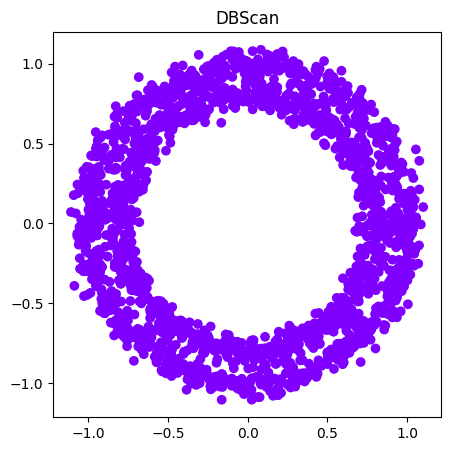

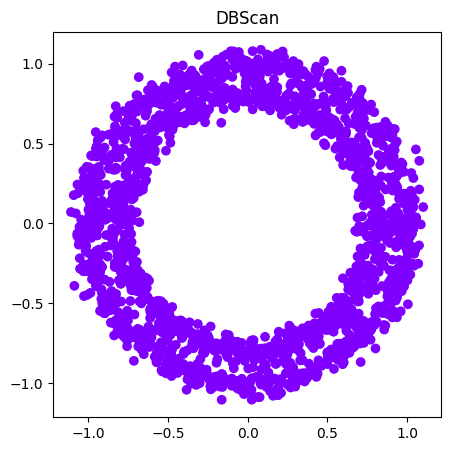

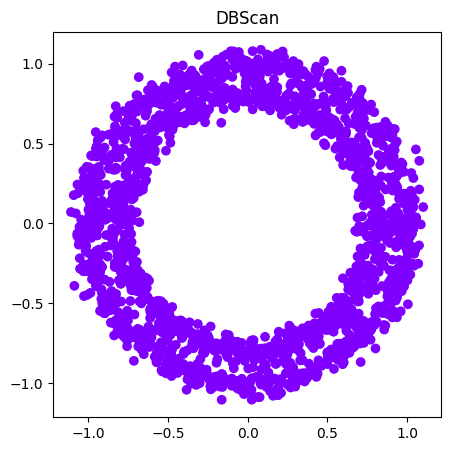

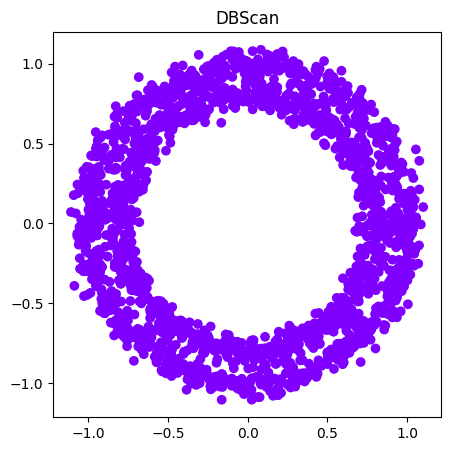

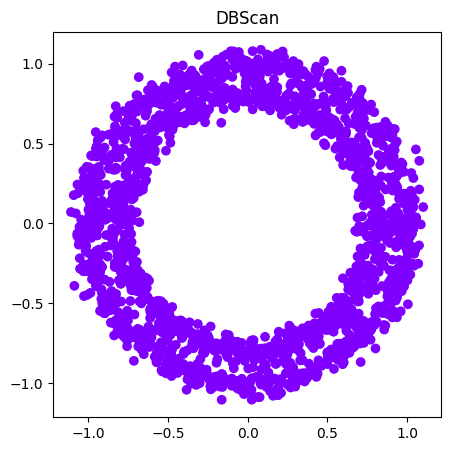

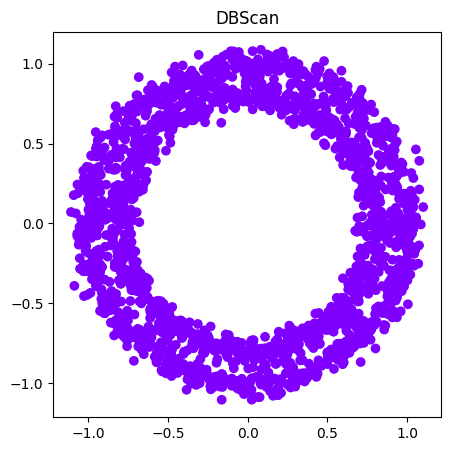

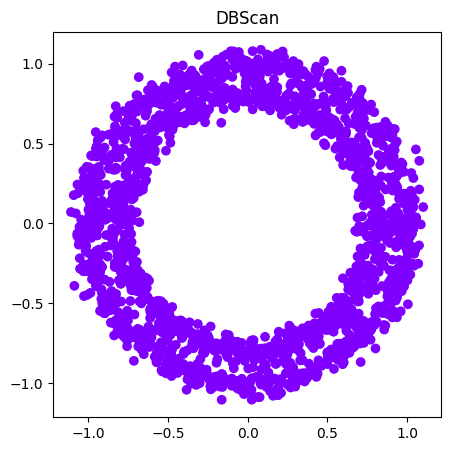

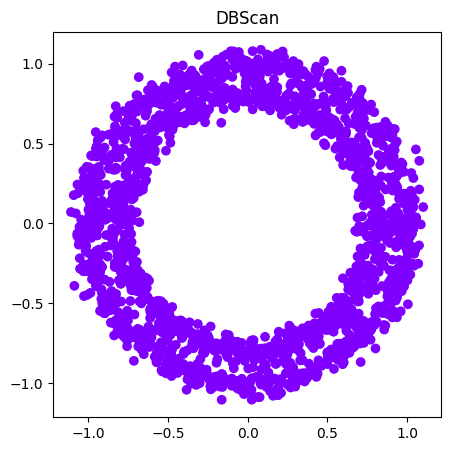

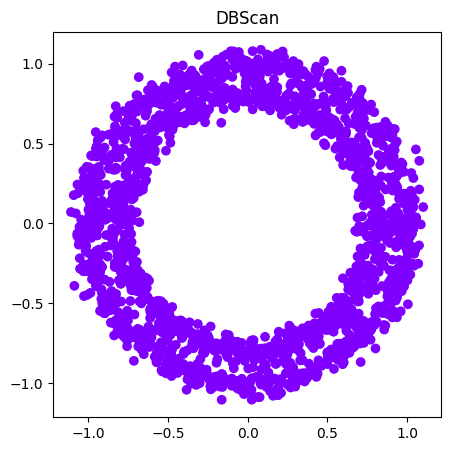

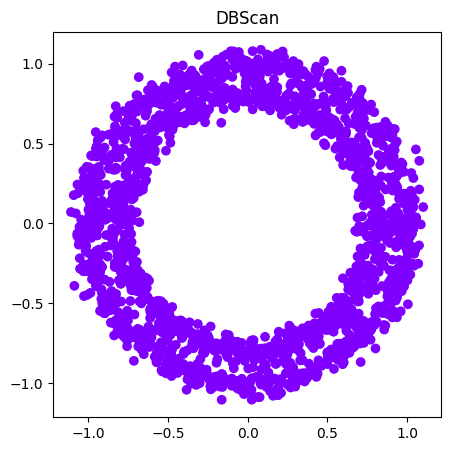

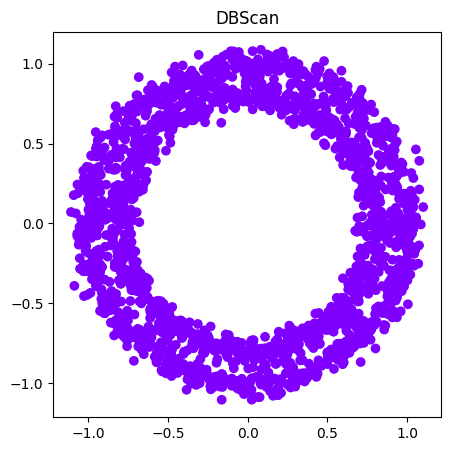

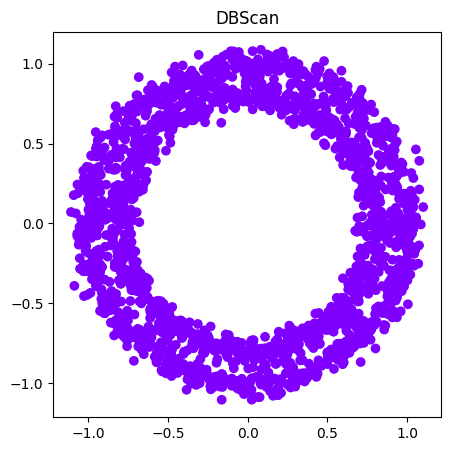

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

#db = DBSCAN(eps=0.5, min_samples=5)
#db.fit(DadosTreino)
#X = db.labels_
resultados = open('resultados_dbscan.txt', 'w')

for i in range(10, 70 + 1, 5):
    #print("eps = ", float(i/100))
    for j in range(1, 30 + 1, 4):
        #print("min_samples = ", j)
        resultados.write(f"\neps = {float(i/100)}\n")
        resultados.write(f"min_samples = {j}\n\n")
        db = DBSCAN(eps=float(i/100), min_samples=j)
        labels = db.fit_predict(DadosTreino)
        unique_labels = np.unique(labels)
        n_clusters = unique_labels.size
        db.fit(DadosTreino)
        X = db.labels_
        #print(X)
        #print(DadosTreino)
        inertia_ = calculate_inertia(labels, X)
        #print(inertia_)
        #if(n_clusters > 1):
        #print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",inertia_)
        resultados.write(f"{inertia_}\n")
        #print("\nCoesão: ",math.sqrt(inertia_)/n_clusters)
        resultados.write(f"{math.sqrt(inertia_)/n_clusters}\n")

        #print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,db.labels_))
        if(n_clusters > 1):
            resultados.write(f"{metrics.silhouette_score(DadosTreino,db.labels_)}\n")
        else:
            resultados.write("n_cluster == 1\n")

        #print("\nRand Score dbscan: ",metrics.rand_score(dados['label'],db.labels_))
        resultados.write(f"{metrics.rand_score(dados['label'],db.labels_)}\n")

        #print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],db.labels_))
        resultados.write(f"{metrics.homogeneity_score(dados['label'],db.labels_)}\n")

        #print("\nCompletude : ",metrics.completeness_score(dados['label'],db.labels_))
        resultados.write(f"{metrics.completeness_score(dados['label'],db.labels_)}\n")

        #print("\nMatriz de contingência dbscan\n", contingency_matrix(dados['label'], db.labels_))
        resultados.write(f"{contingency_matrix(dados['label'], db.labels_)}\n")
        plotagraficos(X, 'DBScan')



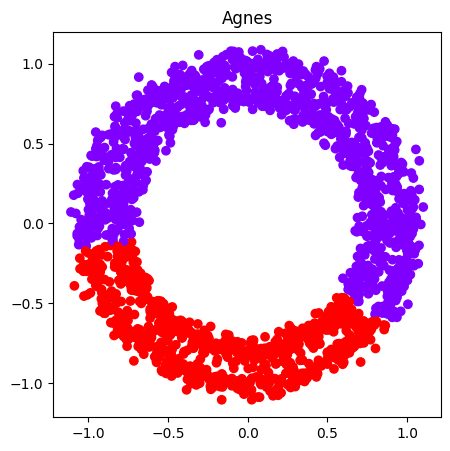

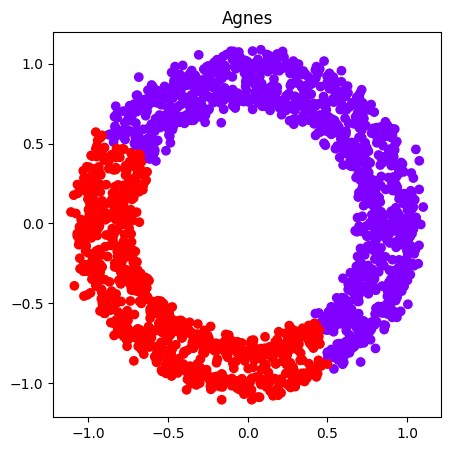

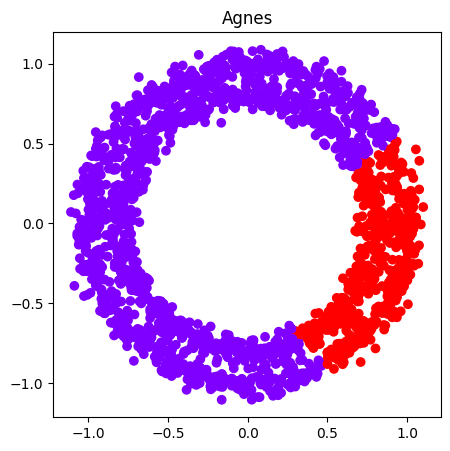

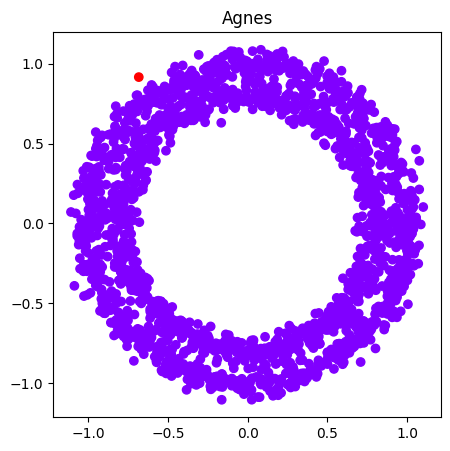

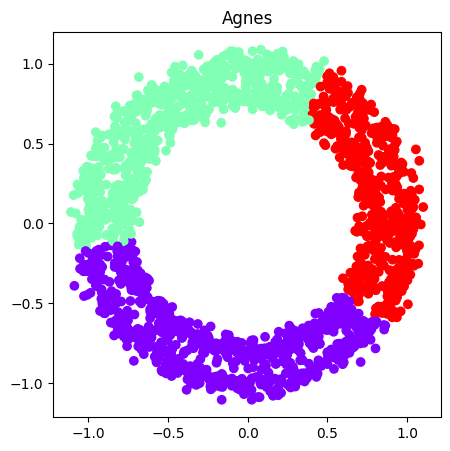

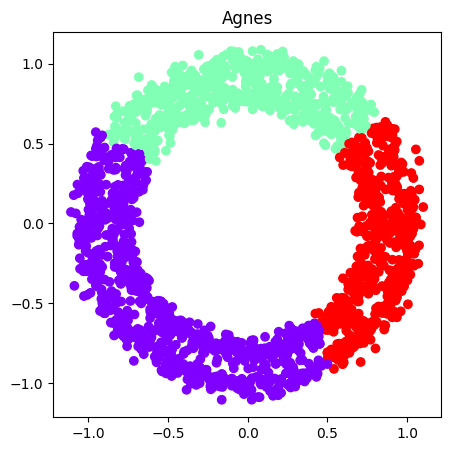

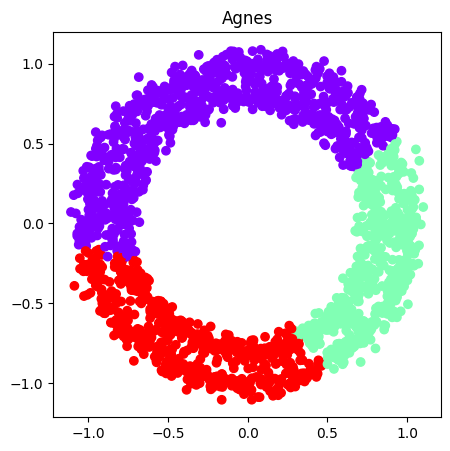

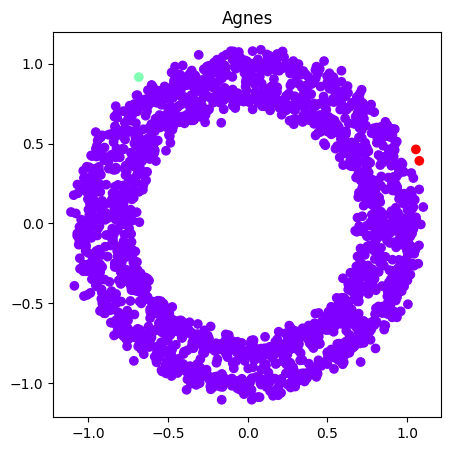

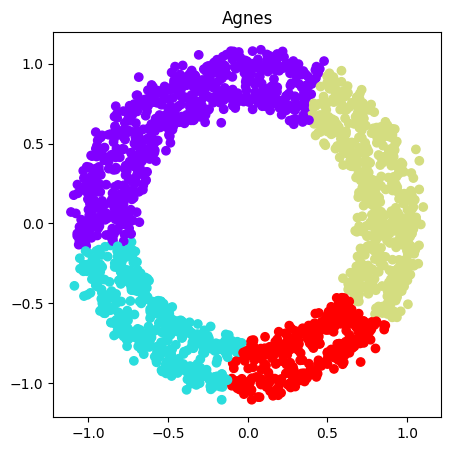

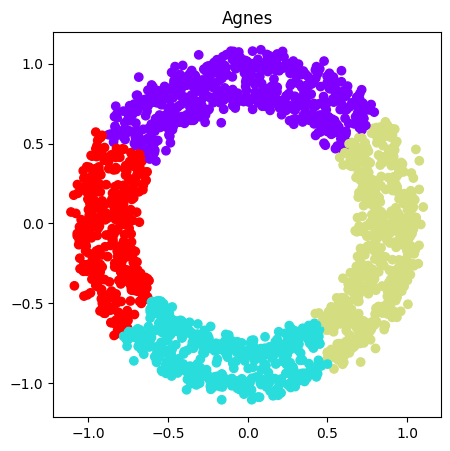

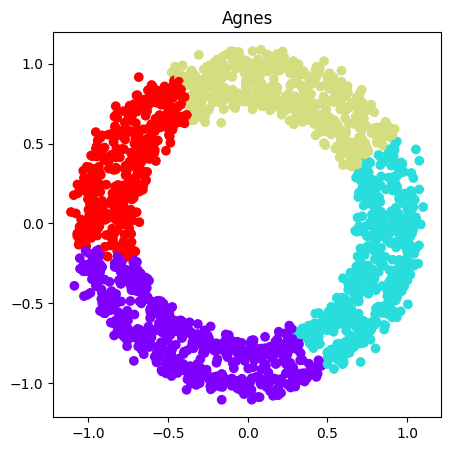

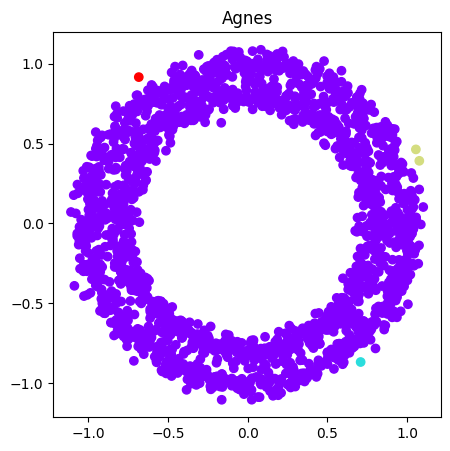

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math
Agnes = AgglomerativeClustering(n_clusters=8,linkage='ward')
Agnes.fit(DadosTreino)
X = Agnes.labels_

resultados = open('resultados_agnes.txt', 'w')
link_param = ['ward', 'average', 'complete', 'single']

for i in range(2, 4 + 1):
    for j in range(0, 4, 1): # vai iterar na lista dos tipos de linkage
        resultados.write(f"\nn_clusters = {i}\n")
        resultados.write(f"link_param = {link_param[j]}\n\n")
        Agnes = AgglomerativeClustering(n_clusters = i, linkage = link_param[j])
        Agnes.fit(DadosTreino)
        labels = Agnes.fit_predict(DadosTreino)
        X = Agnes.labels_
        inertia_ = calculate_inertia(labels, X)

        unique_labels = np.unique(labels)
        n_clusters = unique_labels.size

        #print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",inertia_)
        resultados.write(f"{inertia_}\n")

        #print("\nCoesão: ",math.sqrt(inertia_)/n_clusters)
        resultados.write(f"{math.sqrt(inertia_)/n_clusters}\n")

        #print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,Agnes.labels_))
        resultados.write(f"{metrics.silhouette_score(DadosTreino,Agnes.labels_)}\n")

        #print("\nRand Score Agnes: ",metrics.rand_score(dados['label'],Agnes.labels_))
        resultados.write(f"{metrics.rand_score(dados['label'],Agnes.labels_)}\n")

        #print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],Agnes.labels_))
        resultados.write(f"{metrics.homogeneity_score(dados['label'],Agnes.labels_)}\n")

        #print("\nCompletude : ",metrics.completeness_score(dados['label'],Agnes.labels_))
        resultados.write(f"{metrics.completeness_score(dados['label'],Agnes.labels_)}\n")

        #print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], Agnes.labels_))
        resultados.write(f"{contingency_matrix(dados['label'], Agnes.labels_)}\n")
        plotagraficos(X, 'Agnes')